### Kaggle Competiton ##

Howdy Nelson.
First things fist: MASS IMPORT

In [81]:
#IMPORTING THINGS
import requests
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
#IMPORTING SKLEARN THINGS
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn import linear_model

from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

The purpose of this competition is to build a model that predicts housing prices accurately. I will have training data, and test data. The game plan is to evaluate the training data using .head, plots, the datadescription.txt file, and of course my over abundance of real estate knowledge. Let's just start with .head.

In [82]:
data =  pd.read_csv("C:/Users/Noah/Desktop/ECON 213/Kaggle Competition/train.csv",)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Even with just seeing 20ish of the columns, it looks like we have all sorts of data. LotArea is a continous variable, Kitchen Baths is a discrete variable, MSZoning is some sort of categorical data, and year made is somewhere in between. Looks like we are going to have to decide what to do with each type of variable. 

One thing that is important to me is to see which variabes have missing data. If we have variables that have a majority of missing data, then there must be something going on that needs to be changed.

In [83]:
#Shows which variables have NaN values and how many.
data.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

Well some of these are explained well! Looks like 1453 of the houses don't have a pool, which explains why there is no Pool Quality. About 1200 don't have fences, 80ish don't have garages, and one poor house seems to not even have electricity. Before we do anything to fix these columns, let's plot some data and see what is most important.

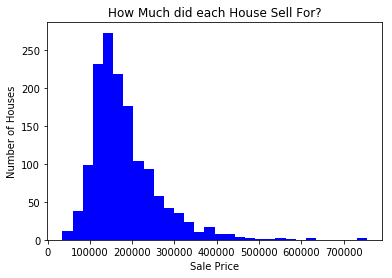

In [84]:
plt.hist(data.SalePrice, 30, facecolor = 'blue')
plt.title('How Much did each House Sell For?')
plt.ylabel("Number of Houses")
plt.xlabel("Sale Price")

plt.show()

Above is a histogram that shows how many houses were sold for each price range. It appears that our data is skewed to the right with just a handfold of houses sold for over 400K. My boy James taught me how to normalize by taking the log of the saleprice and then graphing that. Let's see if it works!

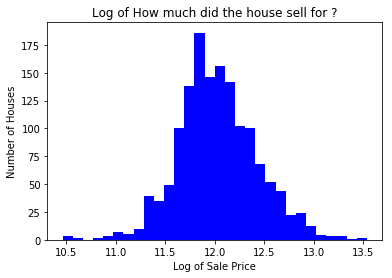

In [85]:
plt.hist(np.log(data.SalePrice), 30, facecolor = 'blue')
plt.title('Log of How much did the house sell for ?')
plt.ylabel("Number of Houses")
plt.xlabel("Log of Sale Price")

plt.show()

I genuinley am surprised by that... This is the data I'll be working with later.

### Scatter Plots###
So, I'm going to do scatter plots of 6 different variables. Just by my own assumptions I'm going to try to guess 3 super correlated variables, and three super uncorrelated variables. Let's see how it goes.

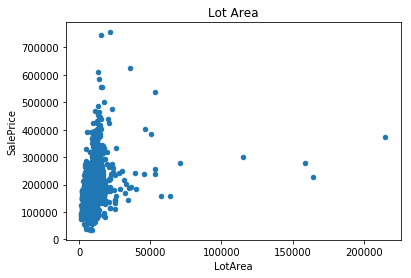

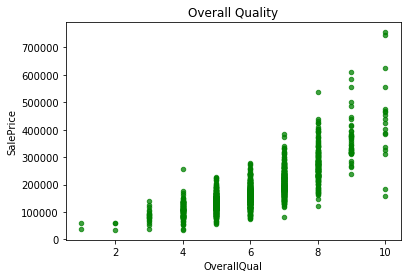

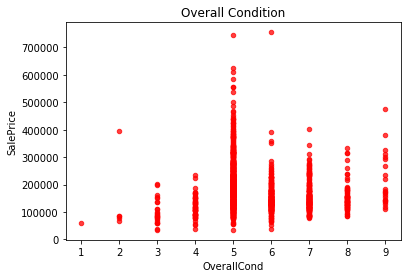

In [86]:
plot = data.plot(kind="scatter", x = 'LotArea', y = 'SalePrice')
plt.title("Lot Area")
plot = data.plot(kind="scatter", x = 'OverallQual', y = 'SalePrice', alpha = .75, color = 'green')
plt.title("Overall Quality")
plot = data.plot(kind="scatter", x = 'OverallCond', y = 'SalePrice', alpha = .75, color = 'red')
plt.title("Overall Condition")
plt.show()

It seems that My guesses were pretty okay! For Lot Area, it seems that there defintely is a correlation, but there are plenty of outliers that stretch the data. Overall Quality seems effective for predictions. Overall Condition was a surprise because a majority of the high selling houses are in the 5-6 range.

Now let's take a stab at the ones I think will be uncorrelated.

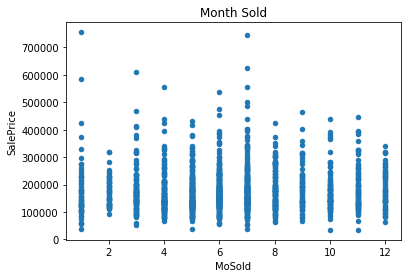

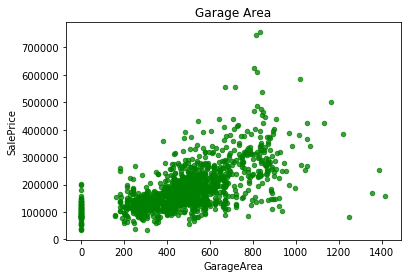

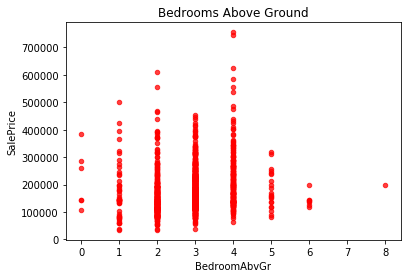

In [87]:
plot = data.plot(kind="scatter", x = 'MoSold', y = 'SalePrice')
plt.title("Month Sold")
plot = data.plot(kind="scatter", x = 'GarageArea', y = 'SalePrice', alpha = .75, color = 'green')
plt.title("Garage Area")
plot = data.plot(kind="scatter", x = 'BedroomAbvGr', y = 'SalePrice', alpha = .75, color = 'red')
plt.title("Bedrooms Above Ground")
plt.show()

Huh. Months sold looks to be roughly unformly distributed. Garage area... hmm.. Well houses without garages sell for less! That's for sure. In general it seems that the garage area ranges widely off the line of best fit. Bedrooms above ground is confusing! The houses with 5, 6, or even 8 bedrooms about ground sell for a low price. There must be other lurking variables.

Now that we have some graphs to go off of, let's do some actually correlation and see what our top 10 most correlated variables are.

First, I want to look at the general information of the Sales Price Column.

In [88]:
print(data.SalePrice.describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [89]:

numeric_features = data.select_dtypes(include=[np.number])
    #makes a data frame that only has numerical data.
corr = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:13])
print (corr['SalePrice'].sort_values(ascending=False)[-13:])

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Name: SalePrice, dtype: float64
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


Okay Awesome! So we have the top 12 most correlated variables! I'm thinking that if I just stick with these variables I can produce a model that is fairly accurate. However, while looking at these, it seems like a few are fairly similar. For example, Ground living area, basement square footage, and first floor square footage are all in the same ball park. Also, garage year built and house year built are probably similar. This will probably create some bias and auto correlation in my linear models. 

In [90]:
target = data.SalePrice
train = data[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt','MasVnrArea']]
train.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea
0,7,1710,2,548,856,856,2,8,2003,2003,2003.0,196.0
1,6,1262,2,460,1262,1262,2,6,1976,1976,1976.0,0.0
2,7,1786,2,608,920,920,2,6,2001,2002,2001.0,162.0
3,7,1717,3,642,756,961,1,7,1915,1970,1998.0,0.0
4,8,2198,3,836,1145,1145,2,9,2000,2000,2000.0,350.0


YUH. Now let's run a linear regression on this puppy.

From my last attempt to do this entire project, I learned that Null data MESSES with linear regression.

In [91]:
train.isnull().sum()

OverallQual      0
GrLivArea        0
GarageCars       0
GarageArea       0
TotalBsmtSF      0
1stFlrSF         0
FullBath         0
TotRmsAbvGrd     0
YearBuilt        0
YearRemodAdd     0
GarageYrBlt     81
MasVnrArea       8
dtype: int64

Looks like 81 of our houses NEVER had a garage built. However, since GarageYrBlt will almost always be the same as the year the house was built, I'll just drop that column from our model training data.

In [92]:
train = train.drop(['GarageYrBlt'], axis = 1)

The other variable with Null data is "Masonry veneer area in square feet"... Whatever that is. I'm conflicted. Should I throw replace null data with 0 or with the average? Since there are already plenty of data points with 0 square feet, I'll replace the null data with the average because the average will be super low. Shouldn't effect anything too much!

In [93]:
train.MasVnrArea

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
5         0.0
6       186.0
7       240.0
8         0.0
9         0.0
10        0.0
11      286.0
12        0.0
13      306.0
14      212.0
15        0.0
16      180.0
17        0.0
18        0.0
19        0.0
20      380.0
21        0.0
22      281.0
23        0.0
24        0.0
25      640.0
26        0.0
27      200.0
28        0.0
29        0.0
        ...  
1430      0.0
1431      0.0
1432      0.0
1433    318.0
1434      0.0
1435    237.0
1436      0.0
1437    426.0
1438      0.0
1439     96.0
1440      0.0
1441    147.0
1442    160.0
1443      0.0
1444    106.0
1445      0.0
1446    189.0
1447    438.0
1448      0.0
1449      0.0
1450      0.0
1451    194.0
1452     80.0
1453      0.0
1454      0.0
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1460, dtype: float64

In [94]:
train.loc[train['MasVnrArea'].isnull(),'MasVnrArea'] = train['MasVnrArea'].mean()

In [95]:
train.isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
dtype: int64

### Model 1 Linear Regression ###
With everything lined up, let's get an r^2 value.

In [96]:
y = np.log(target)
x_train, x_test, y_train, y_test = train_test_split(train, y, random_state=42, test_size=.33)

lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)
print("My R-squared is:", model.score(x_test, y_test))

My R-squared is: 0.8404869618781632


Not bad not bad.. I've seen a lot worse. The goal with an R-Squared value is to get as close to 1 as possible. Now lets get an MSE

In [97]:
predictions = model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print("First attempt at MSE is:", mse)

First attempt at MSE is: 0.027186027743862178


Holy freak. My goodness that is WAY better than my first project Nelson. Remember how I got like 1.2 billion the first time? I think that getting rid of a majority of the variables was the biggest thing. Also, not worrying too much about awkward categorical data is probably helping.

I found some cool code to compare actual price and predicted price. Let's see what happens.

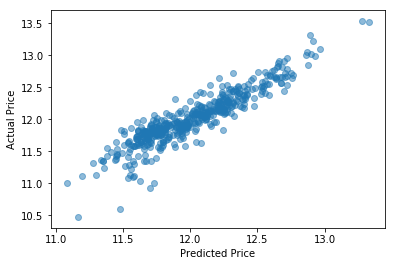

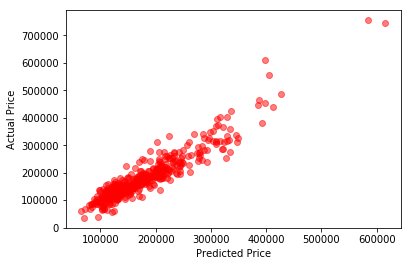

In [98]:
plt.scatter(predictions, y_test, alpha = .5)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.show()
plt.scatter(np.exp(predictions), np.exp(y_test), alpha = .5, color='r')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.show()

Hey that looks pretty good! The top graph keeps all the data in the 'logged' version, while the bottom graph is actual prices. It seems that my model predicts on the low side based on just a slight observation of the graphs and their scaling. Not a big deal!

Questions from the homework about this model:
The reason why I started with a linear regression model is because I feel like the simplicity of it allows for a good benchmark to test my other models against. The biggest assumptions I make with this model is that the data is indeed linear, and that there is no multicollinearity. OBVIOUSLY there is collinearity. Even though I only have 9 variables, I believe that these things are still very correlated. Because of this I know my predictions will be biased, and I believe that my model is most incorrect with the high range prices. The highest actual price was 755K and my most expensive house prediction was 140K lower at 615K. That is alarming. Because of this I am fairly confident that my model is good at predicting the bulk of the houses in Iowa within my inner quartile range, but the tricky houses it will most likely be outliers with inaccurate predictions.

In [99]:
#I want to compare the mins and maxes
print("The max test price is:", round(max(np.exp(y_test)),1))
print("The max predicted price is:", round(max(np.exp(predictions)),1))
print("")
print("The min test price is:", round(min(np.exp(y_test)),1))
print("The min predicted price is:", round(min(np.exp(predictions)),1))

The max test price is: 755000.0
The max predicted price is: 615889.0

The min test price is: 35311.0
The min predicted price is: 65081.7


In [100]:
#I also want to compare the shapes in general
print('Our original data shape was:')
print(np.log(data.SalePrice).describe())
predictions = pd.DataFrame(predictions)
print('Our predicted data shape is:')
print(predictions.describe())

Our original data shape was:
count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64
Our predicted data shape is:
                0
count  482.000000
mean    12.012167
std      0.364172
min     11.083399
25%     11.723152
50%     11.974318
75%     12.249014
max     13.330822


### Model 2 Elastic Net ###

I'm going to use some code from Tyler's lectures to make an Elastic Net model. Hopefully this will be even more accurate than my first model.

In [101]:
clf = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=[.1, 1, 10])
clf.fit(x_train, y_train)
train_predictions = clf.predict(x_train)
test_predictions = clf.predict(x_test)
print("Train MSE: {}".format(mean_squared_error(y_train, train_predictions)))
print("Test MSE: {}".format(mean_squared_error(y_test, test_predictions)))

Train MSE: 0.03120560573180686
Test MSE: 0.026623376754709573


Not bad! But I'm surprised that my MSE is higher on the Elastic Net then just a simple linear regression model. Let's try changing the l1_ratio. Right now my set of hyper parameters are making the assumption that a lasso-ish model would work better. Let's run it again with more possibilites closer to a ridge.

In [102]:
clf = ElasticNetCV(l1_ratio=[.001, .1, .2, .3, .5, .7, 1], alphas=[.1, 1, 10])
clf.fit(x_train, y_train)
train_predictions = clf.predict(x_train)
test_predictions = clf.predict(x_test)
print("Train MSE: {}".format(mean_squared_error(y_train, train_predictions)))
print("Test MSE: {}".format(mean_squared_error(y_test, test_predictions)))

Train MSE: 0.030175469101534326
Test MSE: 0.02660958835324912


Heyo! That decreased my MSE! Not by much, but it goes to show that even a slight change in your hyper parameters can change your results. To answer some of the questions from the homework, I chose this type of model for a couple reasons: the biggest is because Tyler went over it in class and posted his code. However, I think an Elastic Net model is cool because it takes the best of both worlds when it comes to ridge/lasso and, to my understanding, combines the two into a fluid net. I think this is beneficial because it gives a more well rounded approach to the data. Also, because I put my l1_ratio as both .001 and 1, essentially I tested a plain ridge and lasso anyway! Feeding three birds with one scone. I still am puzzled as to why my Linear regression has a smaller MSE. It must be in how I've structured my remaining training data frame. 

### Model 3 Randomized Search SGD Regression ###

Now I'm going to try the Randomized Search tuning to the SGD model that Tyler talked about.

In [103]:
param_dist = {"eta0": [ .001, .003, .01, .03, .1, .3, 1, 3],
             "tol": [0.01, 0.001, 0.0001]}

linear_regression_model = SGDRegressor()

n_iter_search = 8
random_search = RandomizedSearchCV(linear_regression_model, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=3, scoring='neg_mean_squared_error')
random_search.fit(x_train, y_train)

print("Best Parameters: {}".format(random_search.best_params_))
print("Best Negative MSE: {}".format(random_search.best_score_))
tuned_model = SGDRegressor(tol = .01, eta0 = .001)

Best Parameters: {'tol': 0.0001, 'eta0': 0.003}
Best Negative MSE: -5.0888880604598135e+29


Umm... I'm not exactly sure what a negative MSE is, but the fact that there are 29 digits in the number goes to show that this model is crap. In fact, when I ran it on my actual test set all of my predictions turned out to me "inf". I don't think any company in the world would be thrilled if it predicted housing prices to be infinity dollars for their customers. After having messed around with the SGD for a while, I've come to the conclusion that it just isn't a good model for the data! Plain and simple. I've even asked a couple other students and we are all in the same ball park for how crap of an estimate it is. SGD stands for Stochastic Gradient Descent and uses the euclidian norm when making predictions. One assumption that I'm making, which may account for the horrible MSE, is that we even have enough data to fill up the 8 dimensional space that my dataframe is living in. Because of the amount of variables, we need TONS of data for distance to even mean anything. I have a gut feeling that that is why this estimation/model is such bogus

### Submission of my test predictions###

In [104]:
test =  pd.read_csv("C:/Users/Noah/Desktop/ECON 213/Kaggle Competition/test.csv",)
Id = test.Id
# Makes a blank data frame
submission = pd.DataFrame()
# Creates a new column called 'Id' and inserts the numbers 1-1460
submission['Id'] = test.Id
# Prepares the data frame like we did for our training data
test = test[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt','MasVnrArea']]
test = test.drop(['GarageYrBlt'], axis = 1)
test.loc[test['MasVnrArea'].isnull(),'MasVnrArea'] = test['MasVnrArea'].mean()

# Had to deal with some extra NUL data
test.loc[test['GarageCars'].isnull(),'GarageCars'] = test['GarageCars'].mean()
test.loc[test['GarageArea'].isnull(),'GarageArea'] = test['GarageArea'].mean()
test.loc[test['TotalBsmtSF'].isnull(),'TotalBsmtSF'] = test['TotalBsmtSF'].mean()

# Fits the model to ALL my training data, not just the split data
model.fit(train,y)
#runts my model on the test data
tpredictions = model.predict(test)


# Adds the predictions to our submission file
submission['SalePrice'] = np.exp(tpredictions)
submission = submission.to_csv("Submission", index = False)
#submission.head()

The above cell is just a lot of words for "I made a csv with my predictions of test.csv and then saved it" haha. I am content with how I did in the competition! I know the benchmark isn't high, but I'm happy with the score I got! I submitted before and after tuning my model and I moved up a bit! That means the tuning was good. I would appreciate if there was a way to see what parts of my prediction were bad. Like I said earlier, I'm just assuming its the outliers. I'm going to also submit my elastic net just for fun.

In [105]:
#Submission of my elastic net model!
sub2 = clf.predict(test)
sub2 = np.exp(sub2)

submis = pd.DataFrame({"Id":Id,"SalePrice":sub2})
submis.to_csv('Submission 2', index = False)

You know, all in all I'm pleased with what I made! If I was a company I would never sell my models as a product, but for casual use it gets the job done. If I was moving to this place in Iowa then I might throw in my details just to put me in the right ball park. If it came down to flipping houses and trying to make a profit.. I'd find another model to go with/I would hire Nelson to make one. I think I explained all the Homework Questions in cells above so hopefully they were easy to find. Thanks for taking the time to grade these! Till next time Nelson, give care.